# <span style="color:#336699">Agrupamento utilizando redes SOM - I</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autor: Flávio Belizário da Silva Mota
    <br/><br/>
    Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contato: <a href="mailto:flavio.belizario.mota@gmail.com">flavio.belizario.mota@gmail.com</a>
    <br/><br/>
    Data de entrega: 23 de Julho de 2022
    <br>
    Professor: Marcos Goncalves Quiles
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar o uso do SOM na tarefa de agrupamento, como parte do Projeto 2 da disciplina de Neurocomputação (CAP-351). Os dados utilizados são provenientes do conjunto de dados para o benchmark de problemas de agrupamento.
</div>

<br/>
<div>
    <b>Os dados podem ser encontrados em:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    https://github.com/deric/clustering-benchmark
    </div>
</div>

## Instalando e importando bibliotecas

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=a5fa52bf8ef3eb7d6375d5d34df5ac5c25c37ae423775be759f8e8261a376809
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=42418e9d68187a6aa466078c28e5ee79a65b88785f2c2a7b5a271c54089436c1
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import wget
import pandas as pd
from scipy.io import arff
from sklearn import preprocessing
from minisom import MiniSom
import seaborn as sns

## Baixando e carregando os dados

In [4]:
url='https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/longsquare.arff'
wget.download(url)

'longsquare.arff'

In [5]:
data = arff.loadarff('longsquare.arff')
data = pd.DataFrame(data[0])
# removendo o caracter 'b'
for nome_col in data.columns:
  if data[nome_col].dtype != 'float64':
    data[nome_col] = data[nome_col].apply(lambda col: col.decode('utf-8'))

data

,a0,a1,CLASS
0,15.46400,19.44090,0
1,17.79830,14.83670,0
2,15.05220,17.26020,0
3,15.32650,18.12450,0
4,17.72110,15.00530,0
...,...,...,...
895,-7.78466,-4.72809,5
896,4.94591,-5.12020,5
897,2.67831,-5.04219,5
898,-1.83635,-4.29439,5


In [6]:
data['CLASS'].value_counts()

1    155
2    150
4    150
5    150
3    148
0    147
Name: CLASS, dtype: int64

Exibindo os dados do conjunto:

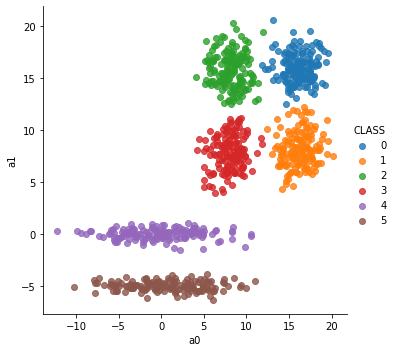

In [7]:
sns.lmplot(x='a0', y='a1', data=data, hue='CLASS', fit_reg=False)

Normalizando os dados:

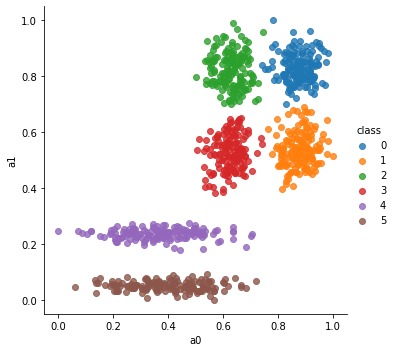

In [8]:
dados = data.drop(columns='CLASS')
dados = preprocessing.MinMaxScaler().fit_transform(dados)
dados = data.drop(columns='CLASS')
dados = preprocessing.MinMaxScaler().fit_transform(dados)
df_red = pd.DataFrame(data=dados, columns=['a0', 'a1'])
df_red['class'] = data['CLASS']
sns.lmplot(x='a0', y='a1', data= df_red, hue='class', fit_reg=False)

In [9]:
dados.shape

(900, 2)

## Funcões utilitárias

In [10]:
def u_matrix(som, dados):
  plt.figure(figsize=(7, 7))

  plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
  plt.colorbar()
  plt.xticks(np.arange(0, m+1, 1.0))
  plt.yticks(np.arange(0, n+1, 1.0))

  markers = ['o','+','*','.','x','s']
  colors = {0:'tab:blue', 
          1: 'tab:orange', 
          2: 'tab:green', 
          3: 'tab:red', 
          4: 'tab:purple', 
          5: 'tab:brown'}
  grupo = data['CLASS'].astype(int).values

  for cnt, xx in enumerate(dados):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5, markers[grupo[cnt]], markerfacecolor='None',
              markeredgecolor=colors[grupo[cnt]], markersize=12, markeredgewidth=2)
  plt.show()

def frequencias(som, dados):
  plt.figure(figsize=(7, 7))
  plt.xticks(np.arange(0, m+1, 1.0))
  plt.yticks(np.arange(0, n+1, 1.0))
  frequencies = som.activation_response(dados)
  plt.pcolor(frequencies.T, cmap='Blues') 
  plt.colorbar()
  plt.show()

def coordenadas_vencedor(som, dados):
  label_names = [0,1,2,3,4,5]

  w_x, w_y = zip(*[som.winner(d) for d in dados])
  w_x = np.array(w_x)
  w_y = np.array(w_y)
  grupo = data['CLASS'].astype(int).values
  colors = {0:'tab:blue', 
            1: 'tab:orange', 
            2: 'tab:green', 
            3: 'tab:red', 
            4: 'tab:purple', 
            5: 'tab:brown'}

  plt.figure(figsize=(7, 7))
  plt.xticks(np.arange(0, m+1, 1.0))
  plt.yticks(np.arange(0, n+1, 1.0))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()

  for c in np.unique(grupo):
      idx_target = grupo==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c], label=label_names[c])
  plt.legend(bbox_to_anchor =(0.65, 1.0))
  plt.grid()
  plt.show()

def hom_impar(m, n, som, dados):
  import matplotlib.gridspec as gridspec

  label_names = [0,1,2,3,4,5]
  grupo = data['CLASS'].astype(int).values
  labels_map = som.labels_map(dados, [label_names[t] for t in grupo])

  fig = plt.figure(figsize=(7, 7))
  the_grid = gridspec.GridSpec(n, m, fig)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][l] for l in label_names]
      plt.subplot(the_grid[n-1-position[1],
                          position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.legend(patches, label_names, ncol=3, bbox_to_anchor =(0.65, 1.25))
  plt.show()

def hom_par(m, n, som, dados):
  import matplotlib.gridspec as gridspec

  label_names = [0,1,2,3,4,5]
  grupo = data['CLASS'].astype(int).values
  labels_map = som.labels_map(dados, [label_names[t] for t in grupo])

  fig = plt.figure(figsize=(7, 7))
  the_grid = gridspec.GridSpec(m, n, fig)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][l] for l in label_names]
      plt.subplot(the_grid[m-1-position[1],
                          position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.legend(patches, label_names, ncol=3, bbox_to_anchor =(0.65, 1.25))
  plt.show()

def centroides(m,n,som,dados):
  winner_coordinates = np.array([som.winner(x) for x in dados]).T
  cluster_index = np.ravel_multi_index(winner_coordinates, (m,n))
  for c in np.unique(cluster_index):
      plt.scatter(dados[cluster_index == c, 0],
                  dados[cluster_index == c, 1], label='cluster='+str(c),
                  alpha=.7)

  for centroid in som.get_weights():
      plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                  s=80, linewidths=35, color='k', label='centroid')
  plt.legend();
  plt.title('Grupos encontrados')
  plt.show()

## Modelos

Para o conjunto de dados utilizado, os rótulos de cada grupo já são conhecidos, portanto é possível definir a quantidade esperada de grupos. Os testes a seguir apresentam os resultados com variações da rede (grid, sigma e taxa de aprendizagem).

### Modelo 1

Modelo com grid 2x3 (6 neurônios), sigma de 1 e taxa de aprendizagem de 0,5, treinado por 5000 iterações:

In [11]:
m = 2
n = 3
sigma = 1.
aprendizagem = .5
max_iter = 5000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.10662039008884124
Erro de topografia:  0.0


Matriz U:

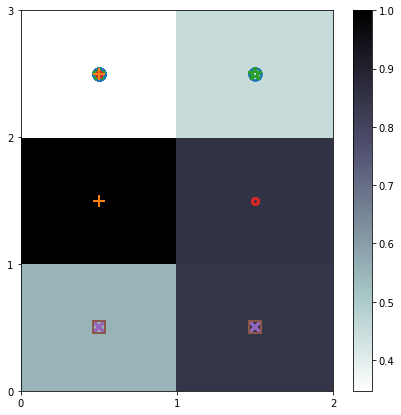

In [12]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

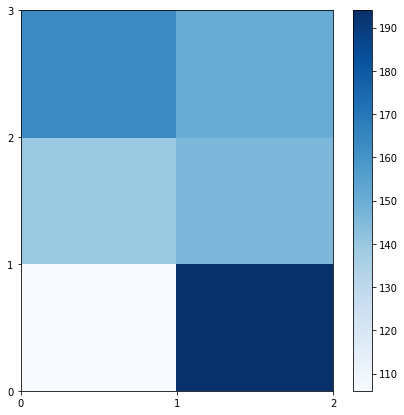

In [13]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

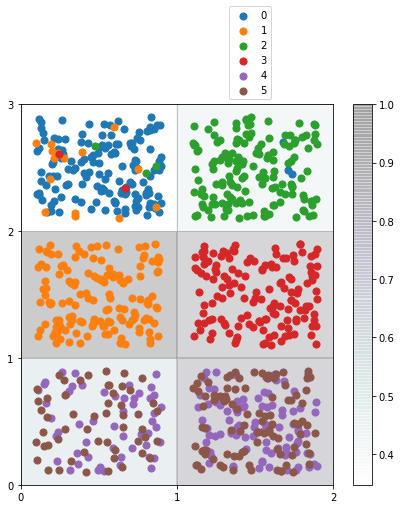

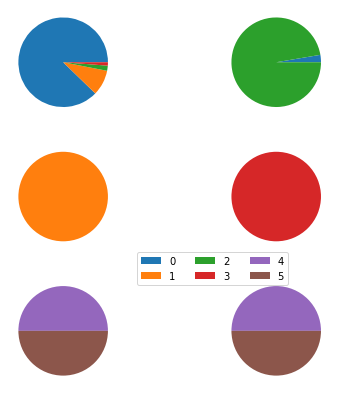

In [14]:
coordenadas_vencedor(som, dados)
hom_impar(m,n,som,dados)

Considerando que essa é uma rede na qual supostamente cada neurônio seria responsável por identificar um grupo, o modelo não é capaz de produzir grupos homogêneos. <br>Os gráficos de dispersão das amostras pelo mapa indicam que o modelo consegue separar em maior número amostras dos grupos 1 e 3, ainda que poucos exemplos sejam associados a outros neurônios.<br> Através da análise da matriz U, é possível notar que o neurônio que agrupa as amostras do grupo 1 é o mais distante dos neurônios vizinhos. Os neurônios da parte inferior do mapa são os que têm maior frequência de ativação, mas nesse caso, indicam neurônios que se associam à amostras de grupos diferentes.

### Modelo 2

Modelo com grid 4x2 (8 neurônios), sigma de 1 e taxa de aprendizagem de 0,4, treinado por 5000 iterações:

In [15]:
m = 4
n = 2
sigma = 1.
aprendizagem = .4
max_iter = 5000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.09695543380529273
Erro de topografia:  0.0


Matriz U:

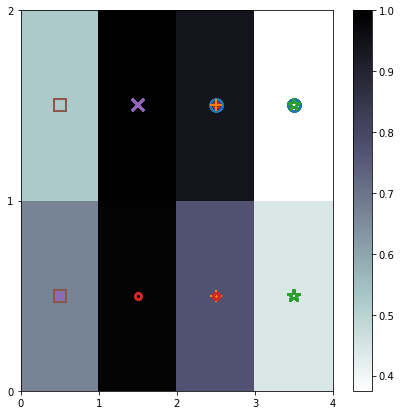

In [16]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

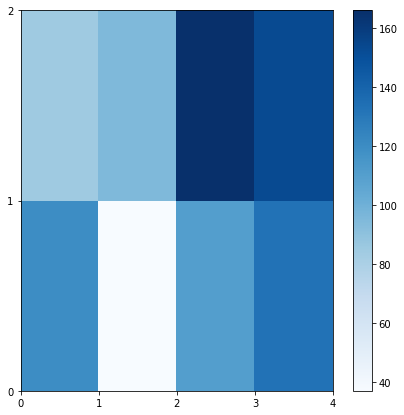

In [17]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

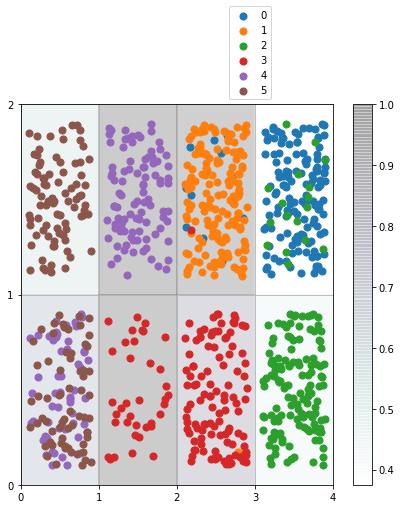

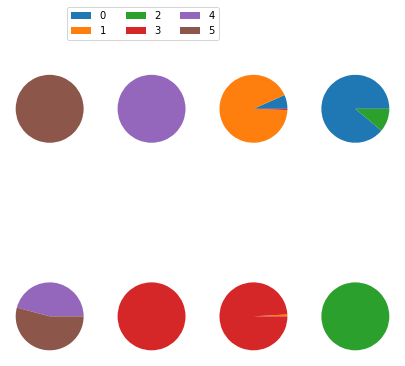

In [18]:
coordenadas_vencedor(som, dados)
hom_impar(m,n,som,dados)

Ao aumentar o tamanho da rede e diminuir a taxa de apendizagem, o erro de quantização dimiui e a rede é capaz de gerar grupos mais homogêneos. <br>A matriz U apresenta mais neurônios com maior distância entre si, indicando mais neurônios capazes de se aproximar das amostras de grupos específicos.

### Modelo 3

Modelo com grid 5x2 (10 neurônios), sigma de 1 e taxa de aprendizagem de 0,5, treinado por 5000 iterações:

In [19]:
m = 5
n = 2
sigma = 1.
aprendizagem = .5
max_iter = 5000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.0806807956998122
Erro de topografia:  0.0


Matriz U:

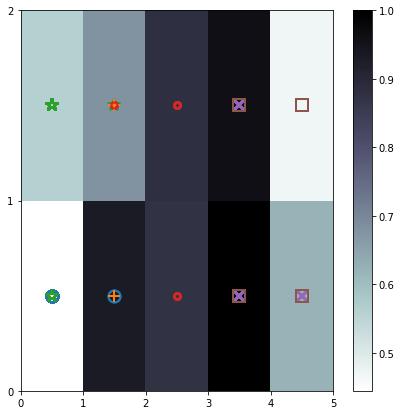

In [20]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

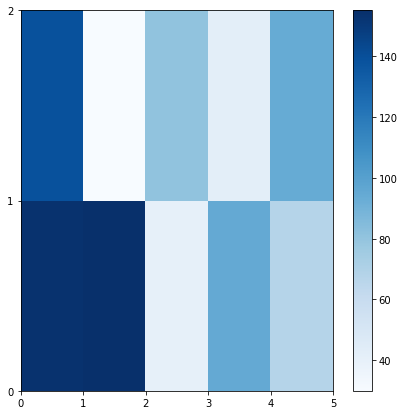

In [21]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

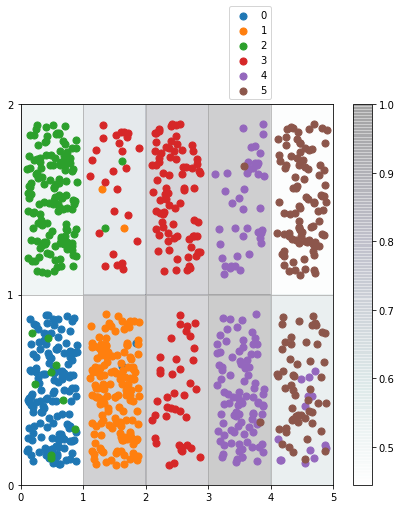

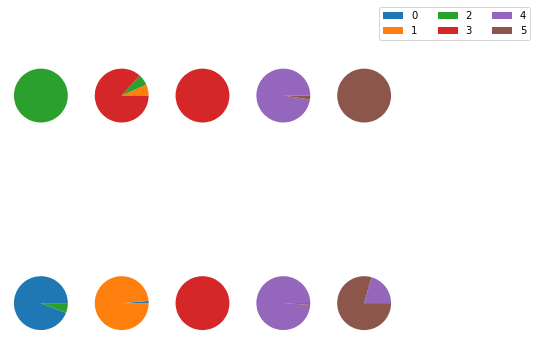

In [22]:
coordenadas_vencedor(som, dados)
hom_impar(m,n,som,dados)

Aumentar o tamanho da rede para 10 neurônios não gerou grupos mais homogêneos, apesar da redução do erro de quantização.

### Modelo 4

Modelo com grid 4x4 (16 neurônios), sigma de 1 e taxa de aprendizagem de 0,5, treinado por 5000 iterações:

In [23]:
m = 4
n = 4
sigma = 1.
aprendizagem = .5
max_iter = 5000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.06841219011459512
Erro de topografia:  0.23777777777777778


Matriz U:

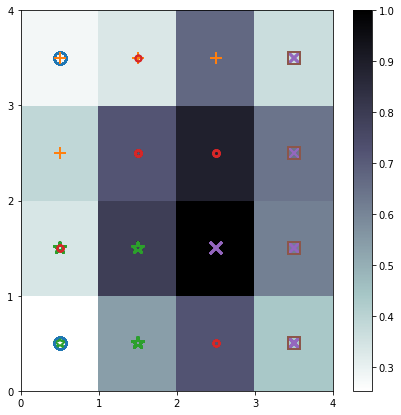

In [24]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

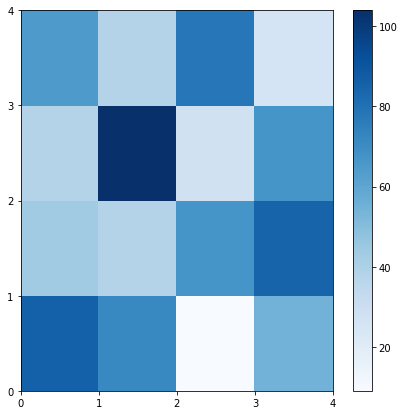

In [25]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

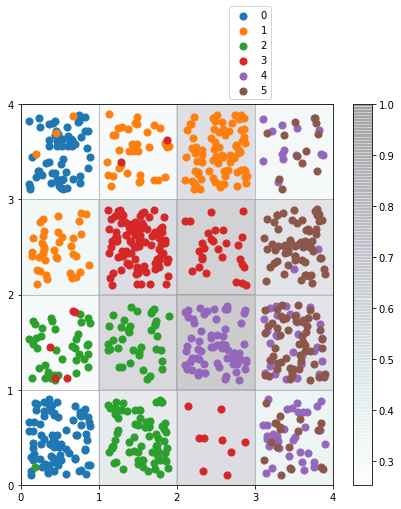

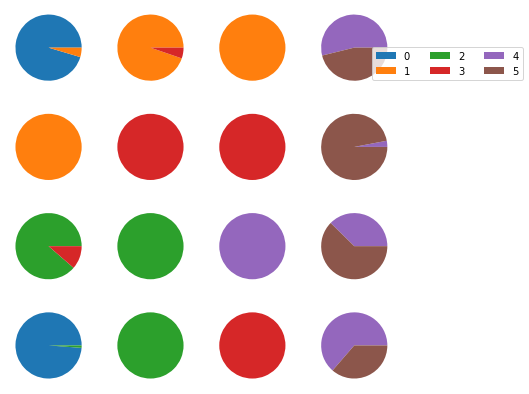

In [26]:
coordenadas_vencedor(som, dados)
hom_par(m,n,som,dados)

Aumentar a dimensão da rede para 16 neurônios diminuiu o erro de quantização e gerou grupos mais homogêneos. Entretando, o aumento acarretou em um erro de topologia da rede e em neurônios que, apesar de se aproximarem mais das amostras de um determinado exemplo, agrupam poucas amostras de um determinado grupo.

### Modelo 5

Modelo com grid 4x4 (16 neurônios), sigma de 0,8 e taxa de aprendizagem de 0,4, treinado por 5000 iterações:

In [27]:
m = 4
n = 4
sigma = .8
aprendizagem = .4
max_iter = 5000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.05135775812906669
Erro de topografia:  0.10777777777777778


Mtriz U:

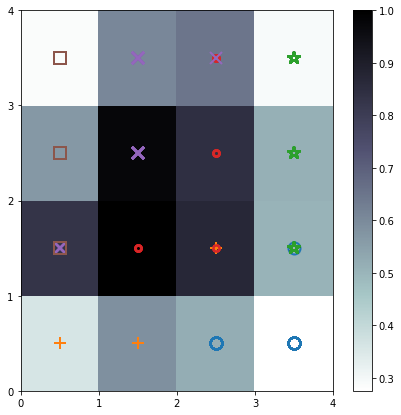

In [28]:
u_matrix(som,dados)

Frequência de ativação dos neurônios da rede:

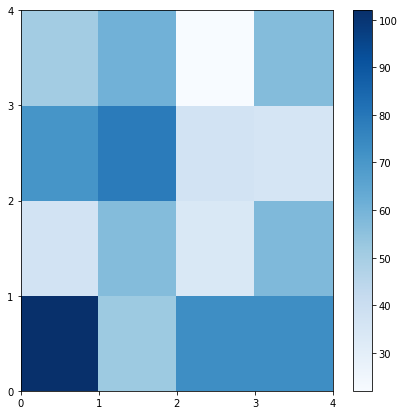

In [29]:
frequencias(som,dados)

Distribuição das amostras pelo mapa:

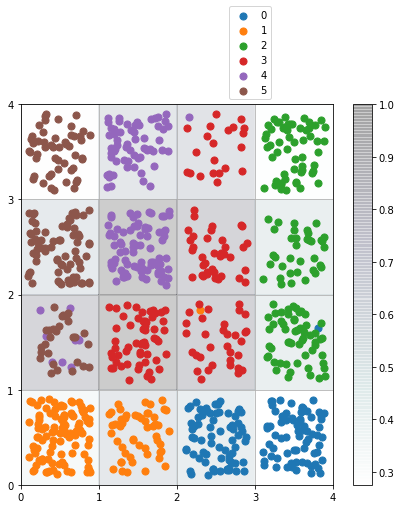

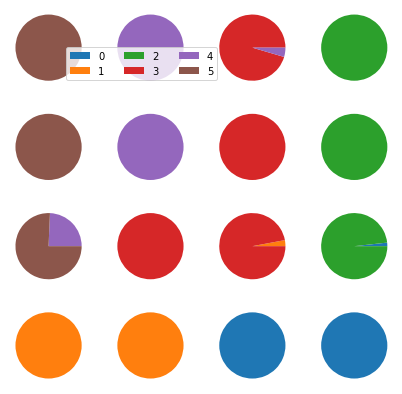

In [30]:
coordenadas_vencedor(som,dados)
hom_par(m,n,som,dados)

Empregar uma rede de 16 neurônios diminuindo o sigma e a taxa de aprendizagem, resultou em uma redução do erro de quantização e de topologia da rede e em agrupamentos mais homogêneos. A análise da matriz U indica mais neurônios que estão distantes de seus vizinhos, o que demonstra maior capacidade de se aproximar das amostras de grupos específicos. O gráfico de frequência de ativação dos neurônios indica que o neurônio responsável pelas amostras do grupo 1 é o mais frequêntemente ativo, o que é justificável por ser o grupo com mais amostras.

### Modelo 6

Modelo com grid 4x4 (16 neurônios), sigma de 0,8 e taxa de aprendizagem de 0,2, treinado por 5000 iterações:

In [31]:
m = 4
n = 4
max_iter = 5000
sigma = .8
aprendizagem = .2
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.05223281297734766
Erro de topografia:  0.06888888888888889


Matriz U:

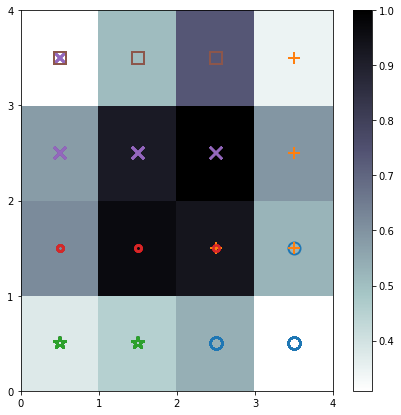

In [32]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

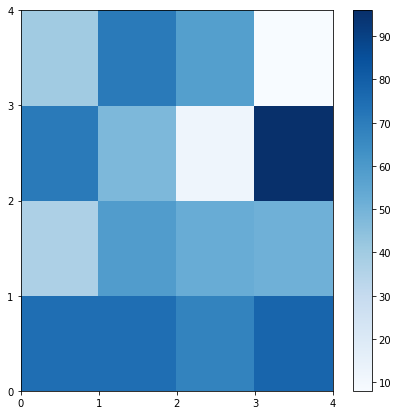

In [33]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

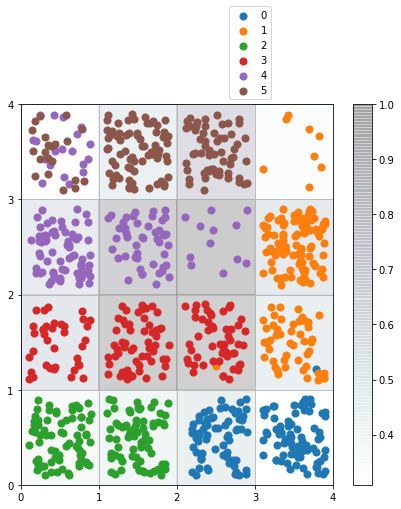

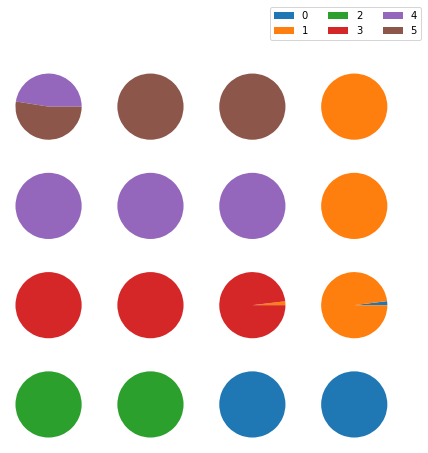

In [34]:
coordenadas_vencedor(som, dados)
hom_par(m,n,som,dados)

Diminuir a taxa de aprendizagem da rede implicou na diminuição do erro da topologia da rede. É possível notar uma menor ativação de certos neurônios, ainda que os agrupamentos gerados mantenham-se homogêneos.

## Considerações Finais

Dado o conjunto de dados utilizado nessa análise, uma rede SOM com 16 neurônios, sigma de 0,8 e taxa de aprendizagem 0,2 apresentou melhor desempenho ao encontrar grupos mais homogêneos, com erros de quantização e topologia de rede menores. Variações de grid, sigma e taxa de aprendizagem indicam que aumentar a rede e diminiuir sigma e taxa de aprendizagem, aumentam as chances de gerar grupos mais homogêneos. Considerando a distribuição do conjunto de dados e o cálculo da distância no qual a rede SOM se baseia para associar uma amostra a um neurônio, o agrupamento dos dados dos grupos 4 e 5 tem maior chance de apresentar homogeneidade menor, como pode ser observado em todos os agrupamentos gerados anteriormente. Separar esses dois grupos envolveria a criação de uma rede com mais neurônios.